In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("project_data.csc")
df = pd.read_csv("project_data.csc")

In [3]:

data

,Unnamed: 0,Prop_Name,Builder,Location,Price,Area,Prc_Sqft,Status,Bathrooms
0,0,5 BHK Apartment in Aliens Space Station,M Kartheek,Tellapur,4.58 Cr,6374,"7,199 / sq ft",Under Construction,Not mentioned
1,1,1 BHK Apartment,Bhargav forcloser,Poranki,65.5 L,1500,"4,366 / sq ft",Ready to move,1 Bathrooms
2,2,2 BHK Apartment in Ramaniyam Anugraha,Ramaniyam Real Estate Builders,West Mambalam,1.4 Cr,1137,"12,313 / sq ft",Under Construction,Not mentioned
3,3,3 BHK Villa,S S Builders private limited,Mangalagiri,75 L,1700,"4,411 / sq ft",Under Construction,4 Bathrooms
4,4,Residential Plot,Bhargav forcloser,Krishna Lanka,19.55 L,1149,"1,701 / sq ft",Resale,Not mentioned
...,...,...,...,...,...,...,...,...,...
2131,2131,Residential Plot,Dial To Property,Edupugallu,32.94 L,1647,"2,000 / sq ft",New,Not mentioned
2132,2132,2 BHK Independent House,satya,Kankipadu,49.99 L,1200,"4,166 / sq ft",Under Construction,2 Bathrooms
2133,2133,Residential Plot in Premier Housing Kuberan Nagar,Premier Housing Properties,Mudichur,37.49 L,1251,"2,997 / sq ft",New,Not mentioned
2134,2134,1 BHK Apartment,Bhargav forcloser,Rajarajeswari Peta,28.5 L,1167,"2,442 / sq ft",Ready to move,1 Bathrooms


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2136 non-null   int64 
 1   Prop_Name   2136 non-null   object
 2   Builder     2136 non-null   object
 3   Location    2136 non-null   object
 4   Price       2136 non-null   object
 5   Area        2136 non-null   int64 
 6   Prc_Sqft    2136 non-null   object
 7   Status      2136 non-null   object
 8   Bathrooms   2136 non-null   object
dtypes: int64(2), object(7)
memory usage: 150.3+ KB


In [5]:
data['Area'] = [int(x) for x in data['Area']]

In [6]:
price = data['Price']

def convert_price_to_float(price_str):
    p=price_str
    price_str = price_str.replace('L', '').replace('Cr', '')  # Remove 'L' and 'Cr' from the string
    price_float = float(price_str)  # Convert the remaining string to a float
    if 'L' in p:
        price_int = int(price_float * 100000) # Convert lakhs to rupees
    elif 'Cr' in p:
        price_int = int(price_float * 10000000)  # Convert crores to rupees
    else:
        price_int = int(price_float) # If no unit is specified, assume rupees
    return price_int

float_price = [convert_price_to_float(p) for p in price]

data['Price']=float_price

In [7]:
price =  data["Prc_Sqft"]

def convert_price_to_int(price_str):
    price_str = price_str.replace(',', '')  # Remove commas from the string
    price_str = price_str.replace('/ sq ft', '').strip()  # Remove "/ sq ft" and leading/trailing spaces
    price_int = int(price_str)  # Convert the remaining string to an integer
    return price_int

int_price = [convert_price_to_int(p) for p in price]

data['Prc_Sqft']=int_price

In [8]:
# Define the manual encoding mappings
status_encoding = {
    'Under Construction': 3,
    'Ready to move': 1,
    'New': 0,
    'Resale': 2
}

# Encode the "Status" column based on the manual mappings
data['Status'] = data['Status'].map(status_encoding)

# Print the encoded values
print(data['Status'])

0       3
1       1
2       3
3       3
4       2
       ..
2131    0
2132    3
2133    0
2134    1
2135    1
Name: Status, Length: 2136, dtype: int64


In [9]:
data['Bathrooms'].unique()

array(['Not mentioned', '1 Bathrooms', '4 Bathrooms', '2 Bathrooms',
       '6 Bathrooms', '3 Bathrooms', '5 Bathrooms', '7 Bathrooms',
       '9 Bathrooms', '8 Bathrooms'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Status', 'Bathrooms', 'Location']
encoders = {}
for column in columns_to_encode:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    encoders[column] = encoder

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2136 non-null   int64 
 1   Prop_Name   2136 non-null   object
 2   Builder     2136 non-null   object
 3   Location    2136 non-null   int32 
 4   Price       2136 non-null   int64 
 5   Area        2136 non-null   int64 
 6   Prc_Sqft    2136 non-null   int64 
 7   Status      2136 non-null   int64 
 8   Bathrooms   2136 non-null   int32 
dtypes: int32(2), int64(5), object(2)
memory usage: 133.6+ KB


In [12]:
print(df['Status'].value_counts())
print(data['Status'].value_counts())

Under Construction    869
Ready to move         664
New                   530
Resale                 73
Name: Status, dtype: int64
3    869
1    664
0    530
2     73
Name: Status, dtype: int64


In [13]:
data

,Unnamed: 0,Prop_Name,Builder,Location,Price,Area,Prc_Sqft,Status,Bathrooms
0,0,5 BHK Apartment in Aliens Space Station,M Kartheek,351,45800000,6374,7199,3,9
1,1,1 BHK Apartment,Bhargav forcloser,283,6550000,1500,4366,1,0
2,2,2 BHK Apartment in Ramaniyam Anugraha,Ramaniyam Real Estate Builders,394,14000000,1137,12313,3,9
3,3,3 BHK Villa,S S Builders private limited,219,7500000,1700,4411,3,3
4,4,Residential Plot,Bhargav forcloser,191,1955000,1149,1701,2,9
...,...,...,...,...,...,...,...,...,...
2131,2131,Residential Plot,Dial To Property,80,3294000,1647,2000,0,9
2132,2132,2 BHK Independent House,satya,158,4999000,1200,4166,3,1
2133,2133,Residential Plot in Premier Housing Kuberan Nagar,Premier Housing Properties,237,3749000,1251,2997,0,9
2134,2134,1 BHK Apartment,Bhargav forcloser,296,2850000,1167,2442,1,0


In [14]:
x=data.drop(columns = ['Unnamed: 0','Price','Prop_Name','Builder'],axis =1)
y=data['Price']

In [15]:
print("input:")
print(x)
print("Output")
print(y)

input:
      Location  Area  Prc_Sqft  Status  Bathrooms
0          351  6374      7199       3          9
1          283  1500      4366       1          0
2          394  1137     12313       3          9
3          219  1700      4411       3          3
4          191  1149      1701       2          9
...        ...   ...       ...     ...        ...
2131        80  1647      2000       0          9
2132       158  1200      4166       3          1
2133       237  1251      2997       0          9
2134       296  1167      2442       1          0
2135       397  1252      6050       1          9

[2136 rows x 5 columns]
Output
0       45800000
1        6550000
2       14000000
3        7500000
4        1955000
          ...   
2131     3294000
2132     4999000
2133     3749000
2134     2850000
2135     7573999
Name: Price, Length: 2136, dtype: int64


In [16]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.2, random_state= 42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (1708, 5)
X_test dimension=  (428, 5)
y_train dimension=  (1708,)
y_test dimension=  (428,)


In [17]:
from sklearn.ensemble import ExtraTreesRegressor
Etree_reg = ExtraTreesRegressor(n_estimators=300, random_state=42).fit(X_train, y_train)

In [18]:
Etree_reg.score(X_train, y_train)

0.9999999985306125

In [19]:
Etree_reg.score(X_test, y_test)

0.959464931298597

In [20]:
y_pred = Etree_reg.predict(X_test)

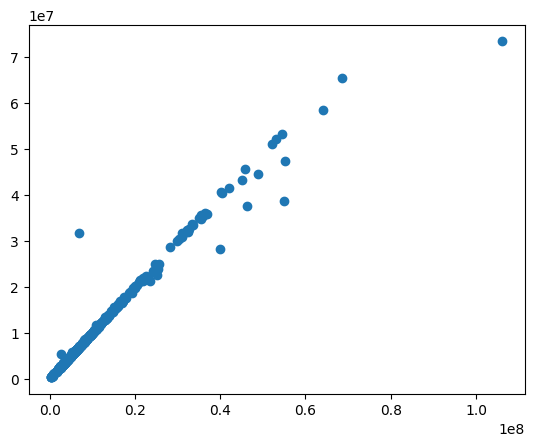

In [21]:
plt.scatter(y_test,y_pred)  # actual --> ytest
plt.show()

In [22]:
cdf = pd.DataFrame({"Actual_values": y_test,
                   "predicted_values":y_pred,
                   "Diff": y_test-y_pred})
cdf

,Actual_values,predicted_values,Diff
1509,7169000,7.092550e+06,76450.173333
233,1855000,2.088760e+06,-233759.760000
438,4320000,4.339477e+06,-19476.596667
298,3600000,3.707586e+06,-107586.296667
1896,22000000,2.119467e+07,805333.340000
...,...,...,...
715,9046000,9.017543e+06,28456.666667
1100,4999000,5.007530e+06,-8530.000000
305,3006000,2.995917e+06,10083.336667
962,6750000,6.568220e+06,181780.140000


In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [24]:
print("r2_score =",r2_score(y_test, y_pred))
print("mean_absolute_error =",mean_absolute_error(y_test, y_pred))
print("mean_squared_error =",mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error =",mean_absolute_percentage_error(y_test, y_pred))

r2_score = 0.959464931298597
mean_absolute_error = 378233.06030373834
mean_squared_error = 5405921797218.448
mean_absolute_percentage_error = 0.025122190074626623


In [25]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor( random_state=52)
regr.fit(X_train ,y_train)

RandomForestRegressor(random_state=52)

In [26]:
regr.score(X_train, y_train)

0.9867037809097464

In [27]:
regr.score(X_test, y_test)

0.9536268596082709

In [28]:
y_pred = regr.predict(X_test)

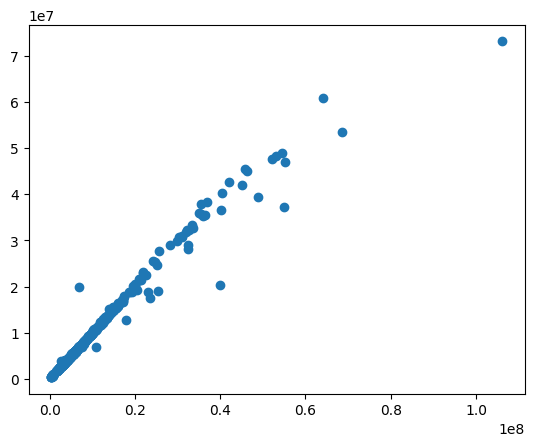

In [29]:
plt.scatter(y_test,y_pred)  # actual --> ytest
plt.show()

In [30]:
cdf = pd.DataFrame({"Actual_values": y_test,
                   "predicted_values":y_pred,
                   "Diff": y_test-y_pred})
cdf

,Actual_values,predicted_values,Diff
1509,7169000,7066289.76,102710.24
233,1855000,1981349.51,-126349.51
438,4320000,4403029.91,-83029.91
298,3600000,4024089.82,-424089.82
1896,22000000,22968999.98,-968999.98
...,...,...,...
715,9046000,8928510.00,117490.00
1100,4999000,5071870.00,-72870.00
305,3006000,2980960.00,25040.00
962,6750000,6761229.82,-11229.82


In [31]:
print("r2_score =",r2_score(y_test, y_pred))
print("mean_absolute_error =",mean_absolute_error(y_test, y_pred))
print("mean_squared_error =",mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error =",mean_absolute_percentage_error(y_test, y_pred))

r2_score = 0.9536268596082709
mean_absolute_error = 543366.9474017209
mean_squared_error = 6184510807069.219
mean_absolute_percentage_error = 0.030872856777677912


In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
regressor = DecisionTreeRegressor(random_state=52)
regressor.fit(X_train ,y_train)

DecisionTreeRegressor(random_state=52)

In [34]:
regressor.score(X_train, y_train)

0.9999999999960653

In [35]:
regressor.score(X_test, y_test)

0.9674134351922001

In [36]:
y_pred = regressor.predict(X_test)

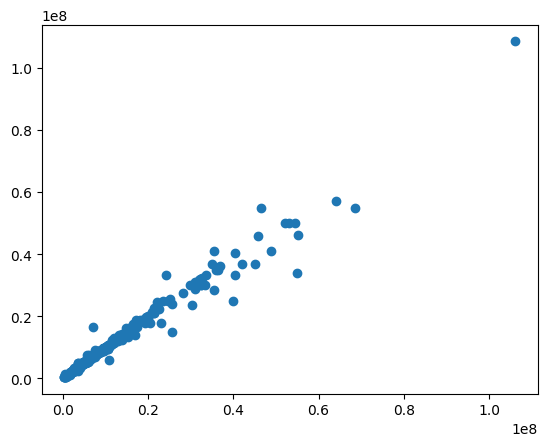

In [37]:
plt.scatter(y_test,y_pred)  # actual --> ytest
plt.show()

In [38]:
cdf = pd.DataFrame({"Actual_values": y_test,
                   "predicted_values":y_pred,
                   "Diff": y_test-y_pred})
cdf

,Actual_values,predicted_values,Diff
1509,7169000,7200000.0,-31000.0
233,1855000,1957999.0,-102999.0
438,4320000,4300000.0,20000.0
298,3600000,5000000.0,-1400000.0
1896,22000000,22500000.0,-500000.0
...,...,...,...
715,9046000,8749000.0,297000.0
1100,4999000,5350000.0,-351000.0
305,3006000,3000000.0,6000.0
962,6750000,6700000.0,50000.0


In [39]:
print("r2_score =",r2_score(y_test, y_pred))
print("mean_absolute_error =",mean_absolute_error(y_test, y_pred))
print("mean_squared_error =",mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error =",mean_absolute_percentage_error(y_test, y_pred))

r2_score = 0.9674134351922001
mean_absolute_error = 671942.7196261683
mean_squared_error = 4345876956287.4766
mean_absolute_percentage_error = 0.050826325294212674


In [40]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=20).fit(X_train,y_train)

In [41]:
neigh.score(X_train, y_train)

0.81929773848861

In [42]:
neigh.score(X_test, y_test)

0.8470671840126328

In [43]:
y_pred = neigh.predict(X_test)

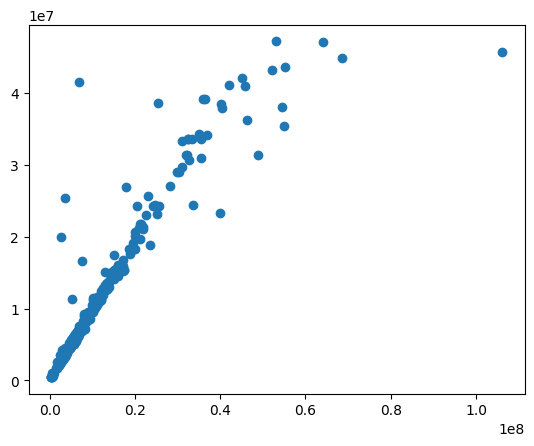

In [44]:
plt.scatter(y_test,y_pred)  # actual --> ytest
plt.show()

In [45]:
cdf = pd.DataFrame({"Actual_values": y_test,
                   "predicted_values":y_pred,
                   "Diff": y_test-y_pred})
cdf

,Actual_values,predicted_values,Diff
1509,7169000,7249850.00,-80850.00
233,1855000,2553999.95,-698999.95
438,4320000,4352599.90,-32599.90
298,3600000,3585849.90,14150.10
1896,22000000,21314999.95,685000.05
...,...,...,...
715,9046000,8899249.95,146750.05
1100,4999000,4897250.00,101750.00
305,3006000,3068500.00,-62500.00
962,6750000,6994199.90,-244199.90


In [46]:
print("r2_score =",r2_score(y_test, y_pred))
print("mean_absolute_error =",mean_absolute_error(y_test, y_pred))
print("mean_squared_error =",mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error =",mean_absolute_percentage_error(y_test, y_pred))

r2_score = 0.8470671840126328
mean_absolute_error = 1148658.7615654205
mean_squared_error = 20395742993461.17
mean_absolute_percentage_error = 0.1068993613712859


In [47]:
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression().fit(X_train, y_train)

In [48]:
Lin_reg.score(X_test,y_test)

0.7988792486437684

In [49]:
Lin_reg.score(X_train, y_train)

0.7197173598539732

In [50]:
y_pred = Lin_reg.predict(X_test)

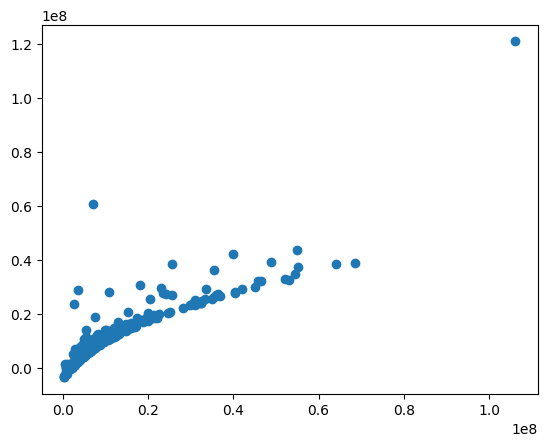

In [51]:
plt.scatter(y_test,y_pred)  # actual --> ytest
plt.show()

In [52]:
cdf = pd.DataFrame({"Actual_values": y_test,
                   "predicted_values":y_pred,
                   "Diff": y_test-y_pred})
cdf

,Actual_values,predicted_values,Diff
1509,7169000,1.078024e+07,-3.611237e+06
233,1855000,2.681323e+05,1.586868e+06
438,4320000,3.982969e+06,3.370308e+05
298,3600000,3.933852e+06,-3.338520e+05
1896,22000000,1.859762e+07,3.402382e+06
...,...,...,...
715,9046000,1.002674e+07,-9.807366e+05
1100,4999000,4.575251e+06,4.237490e+05
305,3006000,2.177359e+06,8.286413e+05
962,6750000,9.356996e+06,-2.606996e+06


In [53]:
print("r2_score =",r2_score(y_test, y_pred))
print("mean_absolute_error =",mean_absolute_error(y_test, y_pred))
print("mean_squared_error =",mean_squared_error(y_test, y_pred))
print("mean_absolute_percentage_error =",mean_absolute_percentage_error(y_test, y_pred))

r2_score = 0.7988792486437684
mean_absolute_error = 2371498.3471003836
mean_squared_error = 26822282247469.69
mean_absolute_percentage_error = 0.41831349095425735


In [54]:
data.corr().round(3)

,Unnamed: 0,Location,Price,Area,Prc_Sqft,Status,Bathrooms
Unnamed: 0,1.000,-0.031,-0.035,-0.022,-0.029,-0.009,0.030
Location,-0.031,1.000,-0.015,-0.035,-0.001,0.065,-0.020
Price,-0.035,-0.015,1.000,0.558,0.684,0.262,0.008
Area,-0.022,-0.035,0.558,1.000,0.053,0.058,0.153
Prc_Sqft,-0.029,-0.001,0.684,0.053,1.000,0.320,-0.129
Status,-0.009,0.065,0.262,0.058,0.320,1.000,-0.031
Bathrooms,0.030,-0.020,0.008,0.153,-0.129,-0.031,1.000


In [55]:
data.describe()

,Unnamed: 0,Location,Price,Area,Prc_Sqft,Status,Bathrooms
count,2136.000000,2136.000000,2.136000e+03,2136.000000,2136.000000,2136.000000,2136.000000
mean,1067.500000,198.607678,9.653255e+06,1764.036049,5332.688202,1.599719,6.328652
std,616.754408,115.553014,1.077805e+07,1264.704739,3815.777489,1.245274,3.658572
min,0.000000,0.000000,2.500000e+05,162.000000,205.000000,0.000000,0.000000
25%,533.750000,95.000000,3.956750e+06,1130.000000,2997.000000,1.000000,2.000000
50%,1067.500000,190.000000,6.500000e+06,1461.000000,5228.500000,1.000000,9.000000
75%,1601.250000,293.000000,1.070000e+07,1900.000000,6895.000000,3.000000,9.000000
max,2135.000000,405.000000,1.498000e+08,19554.000000,82730.000000,3.000000,9.000000


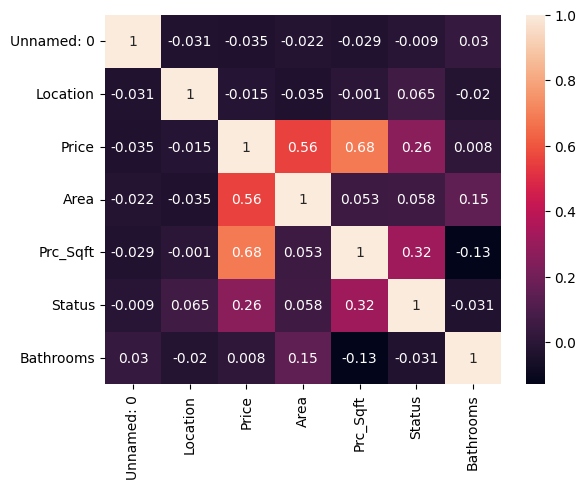

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr().round(3),annot = True )
plt.show()

In [57]:
import plotly.express as px
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import cufflinks as cf


from plotly.offline import iplot
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [58]:
fig = px.scatter(data, x=df['Status'], y='Price')
fig.show() 

In [59]:
fig = px.scatter(data, x='Area', y='Price',color='Location')
fig.show() 

In [60]:
fig = px.scatter(data, x='Area', y='Price',animation_frame=df['Status'],color='Location')
fig.show() 

In [61]:
fig = px.scatter(data, x=df['Bathrooms'], y='Price')
fig.show() 

In [62]:
fig = px.scatter(data, x='Area', y='Price',animation_frame=df['Status'],color=df['Location'],height = 600)
fig.show() 

In [63]:
fig = px.scatter(data, x='Prc_Sqft', y='Price',animation_frame=df['Status'],height=600)
fig.show() 

In [64]:
import pickle  # picking model for deployment

In [65]:
# first we dump our model data and the deatures scaled data using pickle

pickle.dump(Etree_reg,open('Etree_regmodel.pkl','wb'))

In [66]:
# Save the encoders using pickle
with open('encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [67]:
# once ppickle files are created lets load the data and test them
pickled_model =  pickle.load(open('Etree_regmodel.pkl','rb'))

In [68]:
# we will also scale the features using encoders.pkl
scaled_model = pickle.load(open('encoders.pkl','rb'))

In [69]:
#Finally we will go for predictions
pred_data = pickled_model.predict(x[0:1])
pred_data

array([45800000.])

In [70]:
print(X_train[0:1])

      Location  Area  Prc_Sqft  Status  Bathrooms
2118       373  3300      6969       1          3
